<a href="https://colab.research.google.com/github/EdenKantor/Cloud-Computing-Course-Tut/blob/main/Cloud_Tut6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# התקנת ספריית Firebase Admin
!pip install firebase

# התקנת חבילות נדרשות במידת הצורך
!pip install firebase beautifulsoup4


Words with Links:

Word: cloud
 - /il-en/cloud/
 - /il-en/cloud/
 - /il-en/applications/
 - /il-en/cloud/sign-in.html
 - /il-en/cloud/free/
 - /il-en/cloud/gartner-mq-strategic-cloud-platform-services-leader/
 - /il-en/cloud/google/oracle-database-at-google-cloud/
 - /il-en/cloud/distributed-cloud/
 - /il-en/cloud/multicloud/
 - /il-en/cloud/public-cloud-regions/
 - /il-en/cloud/hybrid-cloud/
 - /il-en/cloud/cloud-at-customer/dedicated-region/
 - /il-en/cloud/migrate-applications-to-oracle-cloud/
 - /il-en/cloud/migrate-custom-applications-to-cloud/
 - /il-en/cloud/migrate-isv-applications-to-oracle-cloud/
 - /il-en/cloud/cloud-native/api-management/
 - /il-en/cloud/cloud-native/api-management/
 - /il-en/blockchain/cloud-platform/
 - /il-en/cloud/cloud-native/events-service/
 - /il-en/cloud/queue/
 - /il-en/cloud/cloud-native/streaming/
 - /il-en/cloud/java/
 - /il-en/cloud/cloud-native/api-management/
 - /il-en/cloud/events-service/
 - /il-en/cloud/cloud-native/functions/
 - /il-en/c

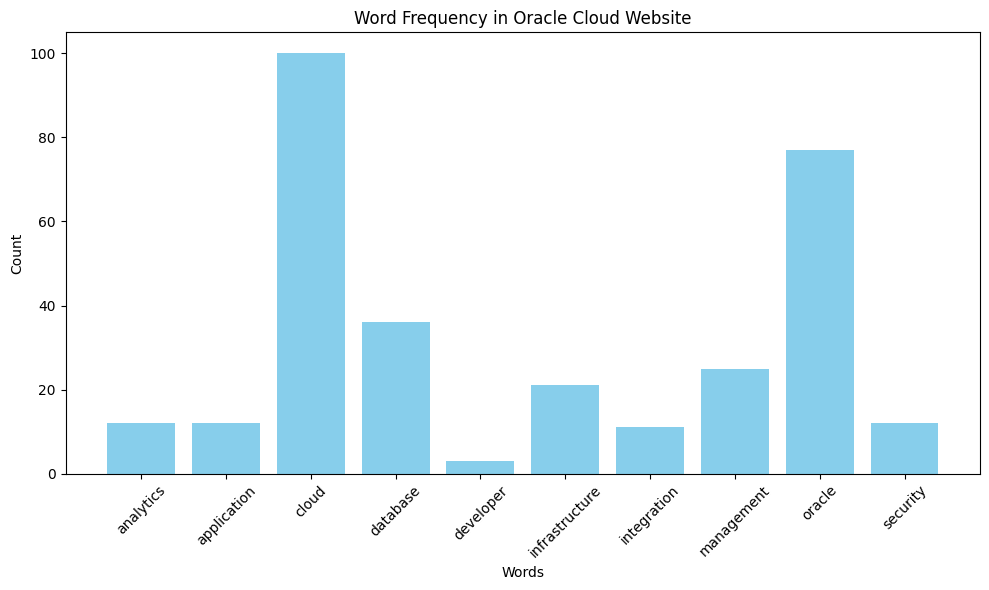

In [6]:
# ייבוא הספריות הדרושות
from firebase import firebase
import requests
from bs4 import BeautifulSoup
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt

# התחברות ל-Firebase Realtime Database עם הקישור שלך
FBconn = firebase.FirebaseApplication('https://cloudtut6-d88dc-default-rtdb.firebaseio.com/', None)

# רשימת המילים לחיפוש
keywords = ["cloud", "oracle", "infrastructure", "application", "database",
            "management", "security", "analytics", "developer", "integration"]

# ניתוח הדף
url = "https://www.oracle.com/il-en/cloud/"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# ספירת מילים
text = soup.get_text().lower()
word_count = defaultdict(int)
for word in text.split():
    word = word.strip(".,!?()[]{}\"'")  # ניקוי סימני פיסוק
    if word in keywords:
        word_count[word] += 1

# מציאת קישורים שבהם המילים מופיעות
links = soup.find_all('a', href=True)
word_links = {word: [] for word in keywords}
for link in links:
    for word in keywords:
        if word in link.text.lower() or word in link['href']:
            word_links[word].append(link['href'])

# הדפסה של המילים עם הקישורים
print("\nWords with Links:")
for word, urls in word_links.items():
    print(f"\nWord: {word}")
    for url in urls:
        print(f" - {url}")

# שמירה ב-Firebase
FBconn.put('/', 'word_index', word_count)
print("\nIndex saved to Firebase:", word_count)

# שליפת הנתונים מ-Firebase
data = FBconn.get('/word_index', None)

# יצירת DataFrame
df = pd.DataFrame(list(data.items()), columns=['Word', 'Count'])

# הצגת הטבלה
print("\nWord Frequency Table:")
print(df)

# יצירת גרף
plt.figure(figsize=(10, 6))
plt.bar(df['Word'], df['Count'], color='skyblue')
plt.title('Word Frequency in Oracle Cloud Website')
plt.xlabel('Words')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
